# Week 11: Tasks

#### Configure your serial connection to your microcontroller. Use the following commands to establish a serial connection.
##### Example
#### For Windows
 %serialconnect to --port=COM3 --baud=115200
#### For macOS
 %serialconnect to --port=/dev/tty.SLAB_USBtoUART --baud=115200

## Task 1: Reading Temperature and Humidity with DHT11 Sensor
#### What is a DHT11 Sensor and How Does It Work?
The DHT11 is a small, low-cost sensor that measures temperature and humidity. It uses a thermistor to detect temperature and a humidity sensor to measure moisture in the air. A tiny chip inside the DHT11 reads this information and sends it as a digital signal to a microcontroller. The sensor updates about once every second, making it great for simple weather or room monitoring projects.

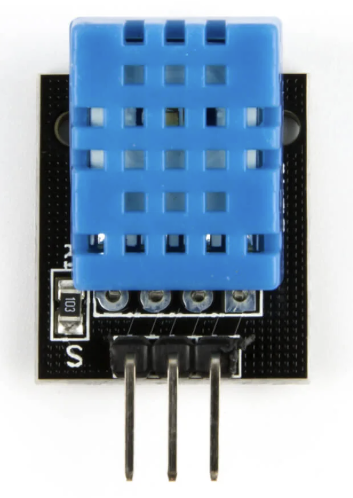

### Scenario
You are part of a team developing a smart room environment monitoring system for an office building. Your task is to program a system using a DHT11 sensor and a Raspberry Pi Pico that can monitor the temperature and humidity of a room.
In addition to printing the temperature and humidity readings on the computer, the system must use an RGB LED to visually show the room's temperature condition:

⏩ If the room is hot, the RGB LED should glow red.

⏩ If the room is cold, the RGB LED should glow blue.

⏩ If the temperature is normal, the RGB LED should glow green.

### Install the DHT Library
You will need a MicroPython DHT library to read data from the DHT11 sensor. Follow these steps to install it:
1.	Open Thonny IDE.
2.	Go to the Tools menu.
3.	Click on Manage Packages.
4.	In the search box, type dht and install the library called DHT.
After installation, you will be able to import and use the DHT functions in your code.

### Example Code
    from time import sleep
    from machine import Pin
    import dht
    DHT = dht.DHT11(Pin(2))
    
    while True:
        DHT.measure()
        temperature = DHT.temperature()
        humidity = DHT.humidity()
        print('Temperature:', temperature, '°C', 'Humidity:', humidity, '%')
        sleep(2)

### Hardware Requirements
1. Breadboard
2. DHT11 Sensor
3. RGB
4. Pi Pico
5. Jumper wires

## Task 2: Displaying Messages on an OLED Screen

#### What is an SSD1306 OLED Display?

The SSD1306 OLED is a small, low-power screen used to display text, images, or graphics. OLED stands for Organic Light Emitting Diode — meaning each pixel lights itself up without needing a backlight. It uses very little electricity and is easy to control with microcontrollers like the Raspberry Pi Pico.
The SSD1306 OLED usually has a screen size of:

•	128×64 pixels (wider screen)

•	or 128×32 pixels (narrower screen)

It communicates using a protocol called I2C (Inter-Integrated Circuit), which only needs two special signal wires called SCL and SDA.

**Serial Data Line(SDA)**	carries the data (the actual information to display).

**Serial Clock Line(SCL)**	Carries the clock signal (keeps data transfer in sync)

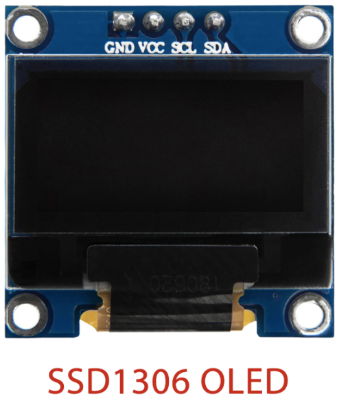

###  Scenario

You are in a team that is designing a smart desk assistant for a workspace, providing essential environmental data and time information. One key system component is an OLED display that continuously updates and shows the current time and date.
Your job is to program the Raspberry Pi Pico to retrieve real-time system time, format it properly, and display it on the OLED screen. 
This feature will be used in modern digital clocks and can be integrated into weather monitoring systems or IoT dashboards.

### Example Code
    from machine import Pin, I2C
    from ssd1306 import SSD1306_I2C
    from time import sleep
    
    # Setup I2C connection
    i2c = I2C(0, scl=Pin(13), sda=Pin(12))  # SCL on GP13, SDA on GP12
    oled = SSD1306_I2C(128, 64, i2c, addr=0x3C)
    
    # Clear the screen
    oled.fill(0)
    
    # Display text
    oled.text('Hello OLED!', 0, 0)
    oled.text('Hello Mohammed!', 0, 10)
    oled.show()
    

### Hardware Requirements
1. Breadboard
3. SD1306 OLED Display
4. Pi Pico
5. Jumper wires

## Task 3: Smart Greenhouse Environmental Monitor


### Scenario 

You have been hired by an agricultural technology company working on smart greenhouse automation.
They aim to create a simple, affordable, real-time monitoring device that displays temperature, humidity, current time, and current date directly on a small OLED screen inside the greenhouse.
This helps farmers and gardeners easily check if the environment is suitable for plant growth, without needing an app or a computer!
You have been assigned to build a prototype using:

➡️ A DHT11 sensor for temperature and humidity measurement,

➡️ A Real-Time Clock (using the Pico’s internal clock for now),

➡️ An SSD1306 OLED display for live visual output,

#### Project Requirements
➡️ Read real-time temperature and humidity every few seconds.

➡️ Display the latest temperature and humidity readings on the OLED.

➡️ Display the current time (hours, minutes, seconds) and the current date (day, month, year).

➡️ Refresh the screen automatically so farmers see updated information easily.

➡️ Print the same data to the serial console for backup/debugging if needed.



### Hardware Requirements
1. Breadboard
2. DHT11 Sensor
3. SD1306 OLED Display
4. Pi Pico
5. Jumper wires

## Task 4: Remote-Controlled LED Light


### Scenario:
Imagine you are designing a simple home automation system.
The user wants to control a small lamp using the remote they already have. 
Use an IR receiver and a remote control to turn an LED on and off by pressing buttons.
They want to:

➡️ Turn the lamp ON when they press the first "Power" button.

➡️ Turn the lamp OFF when they press the second "Power" button.

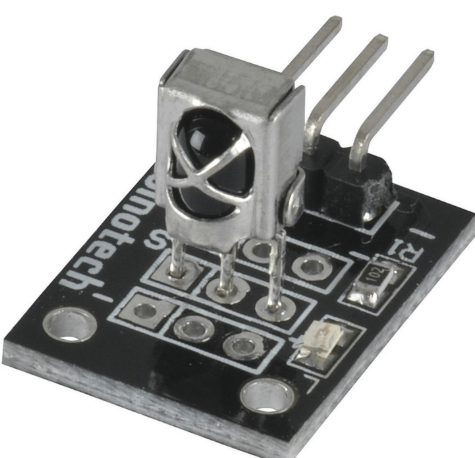




### Example Code

    from machine import Pin, time_pulse_us
    from time import sleep
    
    ir = Pin(2, Pin.IN, Pin.PULL_UP)
    
    print("Point your remote at the IR receiver and press a button…")
    
    while True:
        # ——— Detect start of a button press ———
        # The IR receiver output idles HIGH; pressing any key pulls it LOW.
        
        while ir.value() == 1:
            pass  # wait here until it goes LOW
    
        # ——— the sync pulses ———
        time_pulse_us(ir, 0)  # wait out the long LOW
        time_pulse_us(ir, 1)  # wait out the long HIGH
    
      
        for _ in range(16):
            time_pulse_us(ir, 0)  # skip each short LOW
            time_pulse_us(ir, 1)  # skip each short HIGH
    
        # ——— Read the 8 bits of the command byte ———
        command = 0
        for bit in range(8):
            time_pulse_us(ir, 0)         
            high_time = time_pulse_us(ir, 1)  
           
            if high_time > 1000:
                command |= 1 << bit     # set this bit to 1
    
        # ——— Print the result ———
        print("Button code =", hex(command))
    
        # tiny pause so repeats are clean
        sleep(0.3)


### Hardware Requirements
1. Breadboard
2. IR Sensor
3. IR remote controller
4. LED light
5. Pi Pico
6. Jumper wires

## Task 4: Remote-Controlled LED with Multiple Functions

###  Scenario:
You have been hired to develop a prototype for a smart light controller. The customer wants to reuse old TV remotes to control their lights.
They want simple commands:

➡️ Power ON the light.

➡️ Power OFF the light.

➡️ Toggle the light (if ON, turn OFF; if OFF, turn ON).

➡️ Blink the light repeatedly (for attention or alerts).

You will use an IR receiver, a remote control, and an LED light (to represent a real lamp). Each button on the remote will perform a different action based on its unique code.


### Hardware Requirements
1. Breadboard
2. IR Sensor
3. IR remote controller
4. LED light
5. Pi Pico
6. Jumper wires